<h1 style="text-align: center;"><center>Master&nbsp;in&nbsp;Interdisciplinary&nbsp;and&nbsp;Innovation&nbsp;Engineering Computer&nbsp;Vision</center></h1>
<h2 style="text-align: center;"><center><strong>Neural Networks - Practice 2</strong></center></h2>
<hr />
<p style="text-align: center;"><center><br />Departament de Matem&agrave;tiques (DMAT)<br />Escola d&rsquo;Enginyeria de Barcelona Est (EEBE)<br />Universitat Polit&egrave;cnica de Catalunya (UPC)<br />2023</center></p>
<ul>
<li>Multilayer perceptron</li>
<li>Classification problem</li>
</ul>



---
<h1>Practice 2</h1>
<p>A flower and ornamental company wants to automate the classification of the Iris plant. There are 3 species of iris: Iris <strong>setosa</strong>, Iris <strong>virginica</strong> and Iris <strong>versicolor</strong>. The company collected 50 samples of each species. In each sample, 4 characteristics were measured:</p>
<ul>
<li>sepal length</li>
<li>sepal width</li>
<li>petal length</li>
<li>petal width</li>
</ul>

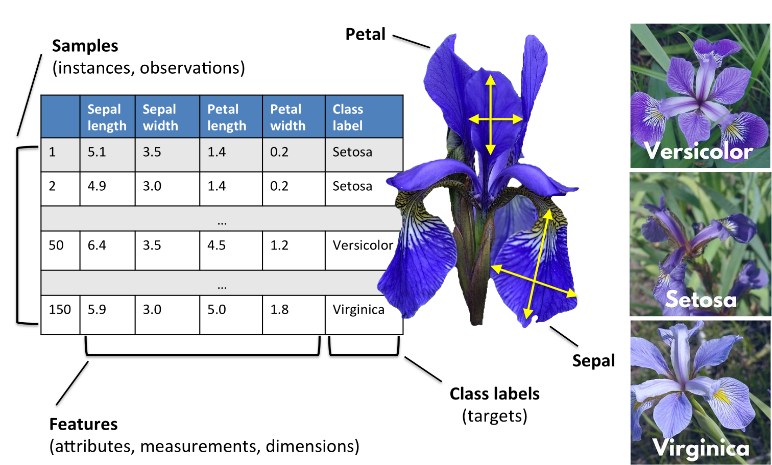


<p>They are interested in classifying the species <font color=#ff0000><strong>Iris setosa</strong></font>, <font color=#ff0000><strong>Iris virginica</strong></font> and <strong><font color=#ff0000>Iris versicolor</font></strong>. Use a <strong>multilayer perceptron</strong> to perform automatic classification.</p>


---



# 1. Iris dataset
We will use the iris dataset to train our perceptron.



*   **Pandas library** is specialized in the management and analysis of **datasets**. We will use this library to create the training set.






In [1]:
import pandas as pd   # load the pandas library, "pd" to simplify the name of the library

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'    # variable where we store iris dataset url

df = pd.read_csv(url, header = None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'labels'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.labels.value_counts() # number of elements of each label

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: labels, dtype: int64

# 2. Multilayer Perceptron (MLP)



*   **NumPy library** is used to work with matrices and multidimensional arrays efficiently.

In [4]:
import numpy as np

**2.1 Define the input data**
*   **Data Normalization** is used to scale data values, helps improve performance of learning models, and reduces the influence of outliers.

In [12]:
X = df.iloc[:,:-1].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X[0])

[-0.90068117  1.03205722 -1.3412724  -1.31297673]


**2.2 Define the output data**

In [17]:
y = df.iloc[:,-1].values
print(y[0:5]) # "0" indicates the initial index to be extracted, "5" indicates the final index, excluding the element with index 5

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


*   Class labels



In [18]:
labels = np.unique(y)
print(labels)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


*   We represent categorical variables using the **one-hot vector** representation

In [19]:
y_one_hot = np.zeros((y.shape[0], len(labels))) # create an array of zeros the size of (output_elements and label_classes)
print(y_one_hot[0:5]) # "0" indicates the initial index to be extracted, "5" indicates the final index, excluding the element with index 5

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


$$1=\begin{pmatrix}
1 \\
0 \\
0 \\
\end{pmatrix}\; 2=\begin{pmatrix}
0 \\
1 \\
0 \\
\end{pmatrix}
\; 3=\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}$$


In [23]:
for i, label in enumerate(labels):
    y_one_hot[y == label, i] = 1
print(y_one_hot) # "0" indicates the initial index to be extracted, "5" indicates the final index, excluding the element with index 5

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

**2.3 Define the multilayer perceptron**

*   Input and Output

In [ ]:
input_neurons = X.shape[1] # 4
output_neurons = y_one_hot.shape[1] # 3

*   Hidden layer neurons

In [ ]:
hidden_neurons = 25

*   Sigmoid activation function
$$\phi(z) = \frac{1}{1 + e^{-z}}$$



In [ ]:
def sigmoid(z):
  return # STUDENT WORK

*   Initial weights

In [ ]:
weights_input_hidden = np.random.uniform(low=-0.1, high=0.1, size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(low=-0.1, high=0.1, size=(hidden_neurons, output_neurons))

*   **Learning rate** : is a hyperparameter that controls the magnitude of the changes that are made to the weights of the neural network during training.

In [ ]:
learning_rate = 0.1

**2.4 Training**

*  **Epoch** is a full loop in which the model processes the entire training 
*   **Forward propagation** is the process by which the outputs of a model are calculated from the inputs.
*   **Updating weights** means that the model gradually adjusts the values of the weights at each iteration

In [ ]:
epochs = 1000

for i in range(epochs):
    # Forward propagation
    hidden_layer_input = # STUDENT WORK
    hidden_layer_output = # STUDENT WORK
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = # STUDENT WORK

    # Error calculation
    error = y_one_hot - output_layer_output

    # Weights update
    weights_hidden_output += learning_rate * np.dot(hidden_layer_output.T, error)
    weights_input_hidden += learning_rate * np.dot(X.T, np.dot(error, weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output))

**2.5 Predict**
*   Plot the **first prediction**



[9.99971882e-01 8.64210725e-06 4.11882960e-37]


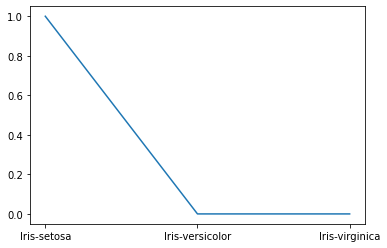

In [ ]:
print(output_layer_output[0])
import matplotlib.pyplot as plt
plt.plot(labels,output_layer_output[0])

*   **np.argmax()** returns the index of the maximum value in an array.

In [ ]:
predictions = np.argmax(output_layer_output, axis=1)

In [ ]:
predictions 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Accuracy** is a metric used to assess the performance of a model.

1.   We change the numerical predictions to labels

In [ ]:
labels_dict = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [ ]:
predictions_labels = [labels_dict[y] for y in predictions]

In [ ]:
print(predictions_labels)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris

2.   We define the accuracy function

$$\text{accuracy}(y_{\text{true}}, y_{\text{pred}}) = \frac{\sum_{i=1}^{n} [y_{\text{true}, i} = y_{\text{pred}, i}]}{n}$$

In [ ]:
def accuracy(y_true, y_pred):
    # STUDENT WORK
    return accuracy

In [ ]:
accuracy(y,predictions_labels)

0.92

# 3. Multilayer Perceptron (MLP) with softmax

$$[\phi(\mathbf{z})]_i = \frac{e^{z_i}}{\sum_{j=1}^t e^{z_k}}$$

In [ ]:
def softmax(x):
    exp_x = np.exp(x)
    return # STUDENT WORK

In [ ]:
# initial parameters
hidden_neurons = 25
epochs = 1000
learning_rate = 0.1

# initial weights
weights_input_hidden = np.random.uniform(low=-0.1, high=0.1, size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(low=-0.1, high=0.1, size=(hidden_neurons, output_neurons))

#
for i in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = # STUDENT WORK
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = # STUDENT WORK

    # Error calculation
    error = y_one_hot - output_layer_output

    # Weights update
    weights_hidden_output += learning_rate * np.dot(hidden_layer_output.T, error)
    weights_input_hidden += learning_rate * np.dot(X.T, np.dot(error, weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output))

**Predict**
*   Plot the **first prediction**

[9.99999290e-001 7.09581223e-007 6.40254441e-134]
0.9999999999999999


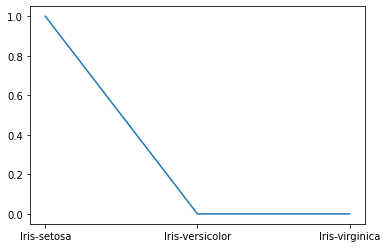

In [ ]:
print(output_layer_output[0])
print(sum(output_layer_output[0])) # The sum of the softmax output is 1
plt.plot(labels,output_layer_output[0])

In [ ]:
predictions = np.argmax(output_layer_output, axis=1)

In [ ]:
predictions 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Accuracy** is a metric used to assess the performance of a model.

1.   We change the numerical predictions to labels
2.   We define the accuracy function
$$\text{accuracy}(y_{\text{true}}, y_{\text{pred}}) = \frac{\sum_{i=1}^{n} [y_{\text{true}, i} = y_{\text{pred}, i}]}{n}$$

In [ ]:
labels_dict = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
predictions_labels = [labels_dict[y] for y in predictions]
print(predictions_labels)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris

In [ ]:
def accuracy(y_true, y_pred):
    # STUDENT WORK
    return accuracy

In [ ]:
accuracy(y,predictions_labels)

0.94

# 4. Multilayer Perceptron (MLP) using Scikit-learn

**Scikit-learn** (sklearn) is a very popular library for machine learning. It has machine learning tools for classification, regression, model selection, and data preprocessing.

*   **MLPClassifier**: Imports a multilayer perceptron classifier model, commonly used for data classification.

*   **StandardScaler**: It is a tool for data normalization, which is commonly used for the standardization of numerical data before it is used in a machine learning model.

*   **Train_test_split**: Used to split a data set into training and test sets.

*   **Accuracy_score**: Used to calculate the accuracy of a classification model based on predictions made on a test data set.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**4.1 Define the input and output data**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

*   **Data Normalization** is used to scale data values, helps improve performance of learning models, and reduces the influence of outliers.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

*   Split a DataFrame into training (**train**) and test (**test**) sets is a common practice in machine learning to evaluate the performance of a predictive model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# STUDENT WORK)

**4.2 Define the model of the multilayer perceptron**



In [ ]:
hidden_neurons = 10
epochs = 1000
sigmoid = 'logistic' # Activation function for the hidden layer, 'logistic' is sigmoid in sklearn library

*   Add the parameters to the MLP

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(# STUDENT WORK,), activation=# STUDENT WORK, max_iter=# STUDENT WORK)

**4.3 Training**
*  **fit()** function for model training, fits the model parameters to the provided training data.

In [ ]:
MLP.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000)

**4.4 Predict**
*   **predict_proba()** is a function to get the prediction probabilities for each model class.

In [ ]:
y_pred_proba = MLP.predict_proba(X_test)

*   **np.argmax()** returns the index of the maximum value in an array.

In [ ]:
y_pred = np.argmax(y_pred_proba, axis=1)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**4.5 Evaluate the performance of the MLP**

*  we assign the labels to the index

In [ ]:
labels_dict = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [ ]:
y_pred_labels = [labels_dict[y] for y in y_pred]

*  **Accuracy** is a metric used to assess the performance of a model.

In [ ]:
acc = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {acc}')

Accuracy: 1.0
